# Linear Regression Model: Develop a linear regression model that predicts the temperature based on historical weather data.

In [7]:
# Data analysis and wrangling
import pandas as pd
import numpy as np
import os
import string
import csv

# Visualization
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import plotly as py
import plotly.subplots
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [8]:
df = pd.read_csv('houston_data_07102020.csv', 
                    header = 0, 
                    error_bad_lines=False,
                    engine='python')

pd.set_option('display.max_columns', None)

C:\Users\KIIT\AppData\Local\Temp\ipykernel_4552\703091841.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('houston_data_07102020.csv',


In [9]:
df.head()

STATION                                     NAME  LATITUDE  LONGITUDE  \
0  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98     -95.36   
1  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98     -95.36   
2  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98     -95.36   
3  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98     -95.36   
4  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98     -95.36   

   ELEVATION      DATE   AWND  DAPR  EVAP  MDPR  PGTM  PRCP  RAIN  SNOW  SNWD  \
0         29  1/1/2016  12.53   NaN   NaN   NaN   NaN  0.00     0   0.0   0.0   
1         29  1/2/2016   6.49   NaN   NaN   NaN   NaN  0.00     0   0.0   0.0   
2         29  1/3/2016   5.59   NaN   NaN   NaN   NaN  0.07     1   0.0   0.0   
3         29  1/4/2016   4.92   NaN   NaN   NaN   NaN  0.00     0   0.0   0.0   
4         29  1/5/2016   6.71   NaN   NaN   NaN   NaN  0.00     0   0.0   0.0   

   TAVG  TMAX  TMIN  TOBS  WDF2   WDF5  WESD  WESF  WSF2  WSF5  WT01  WT02  \
0    48    51    45   NaN    30   30.0   NaN   NaN  21.0  29.1   NaN   NaN   
1    47    51    45   NaN    10  360.0   NaN   NaN  14.1  16.1   NaN   NaN   
2    49    62    43   NaN   310  310.0   NaN   NaN  12.1  16.1   NaN   NaN   
3    49    62    38   NaN    30   20.0   NaN   NaN  10.1  14.1   NaN   NaN   
4    45    55    34   NaN    80   80.0   NaN   NaN  14.1  18.1   NaN   NaN   

   WT03  WT04  WT05  WT06  WT08  WT10  WT11  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [10]:
df.tail()

STATION                                     NAME  LATITUDE  \
1647  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1648  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1649  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1650  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1651  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   

      LONGITUDE  ELEVATION      DATE  AWND  DAPR  EVAP  MDPR    PGTM  PRCP  \
1647     -95.36         29  7/5/2020  5.82   NaN   NaN   NaN     NaN  0.00   
1648     -95.36         29  7/6/2020  6.04   NaN   NaN   NaN     NaN  0.00   
1649     -95.36         29  7/7/2020  5.59   NaN   NaN   NaN     NaN  0.56   
1650     -95.36         29  7/8/2020  7.61   NaN   NaN   NaN     NaN  0.00   
1651     -95.36         29  7/9/2020  9.62   NaN   NaN   NaN  1456.0  0.00   

      RAIN  SNOW  SNWD  TAVG  TMAX  TMIN  TOBS  WDF2   WDF5  WESD  WESF  WSF2  \
1647     0   0.0   0.0    86    96    79   NaN   220  230.0   NaN   NaN  14.1   
1648     0   0.0   0.0    86    91    82   NaN   260  250.0   NaN   NaN  15.0   
1649     1   0.0   0.0    86    94    80   NaN   350  190.0   NaN   NaN  19.9   
1650     0   0.0   0.0    87    96    82   NaN   150  180.0   NaN   NaN  14.1   
1651     0   0.0   0.0    88    98    82   NaN   160  150.0   NaN   NaN  18.1   

      WSF5  WT01  WT02  WT03  WT04  WT05  WT06  WT08  WT10  WT11  
1647  19.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1648  21.9   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN  
1649  23.9   1.0   NaN   1.0   NaN   NaN   NaN   1.0   NaN   NaN  
1650  19.0   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1651  23.9   1.0   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 34 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   STATION    1652 non-null   object 
 1   NAME       1652 non-null   object 
 2   LATITUDE   1652 non-null   float64
 3   LONGITUDE  1652 non-null   float64
 4   ELEVATION  1652 non-null   int64  
 5   DATE       1652 non-null   object 
 6   AWND       1652 non-null   float64
 7   DAPR       0 non-null      float64
 8   EVAP       0 non-null      float64
 9   MDPR       0 non-null      float64
 10  PGTM       22 non-null     float64
 11  PRCP       1652 non-null   float64
 12  RAIN       1652 non-null   int64  
 13  SNOW       1652 non-null   float64
 14  SNWD       1652 non-null   float64
 15  TAVG       1652 non-null   int64  
 16  TMAX       1652 non-null   int64  
 17  TMIN       1652 non-null   int64  
 18  TOBS       0 non-null      float64
 19  WDF2       1652 non-null   int64  
 20  WDF5    

In [12]:
df.rename(columns = {'AWND': 'WINDAVG',
                     'PRCP': 'PRECIPITATION',
                     'TAVG': 'TEMPAVG_F', 
                     'TMAX': 'TEMPMAX_F', 
                     'TMIN': 'TEMPMIN_F'}, inplace=True)

In [13]:
print(df)

          STATION                                     NAME  LATITUDE  \
0     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
2     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
3     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
4     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
...           ...                                      ...       ...   
1647  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1648  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1649  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1650  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1651  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   

      LONGITUDE  ELEVATION      DATE  WINDAVG  DAPR  EVAP  MDPR    PGTM  \
0        -95.36         29  1/1/2016    12.53   NaN   NaN   

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATION        1652 non-null   object 
 1   NAME           1652 non-null   object 
 2   LATITUDE       1652 non-null   float64
 3   LONGITUDE      1652 non-null   float64
 4   ELEVATION      1652 non-null   int64  
 5   DATE           1652 non-null   object 
 6   WINDAVG        1652 non-null   float64
 7   DAPR           0 non-null      float64
 8   EVAP           0 non-null      float64
 9   MDPR           0 non-null      float64
 10  PGTM           22 non-null     float64
 11  PRECIPITATION  1652 non-null   float64
 12  RAIN           1652 non-null   int64  
 13  SNOW           1652 non-null   float64
 14  SNWD           1652 non-null   float64
 15  TEMPAVG_F      1652 non-null   int64  
 16  TEMPMAX_F      1652 non-null   int64  
 17  TEMPMIN_F      1652 non-null   int64  
 18  TOBS    

In [15]:
df.describe()

LATITUDE     LONGITUDE  ELEVATION      WINDAVG  DAPR  EVAP  MDPR  \
count  1.652000e+03  1.652000e+03     1652.0  1652.000000   0.0   0.0   0.0   
mean   2.998000e+01 -9.536000e+01       29.0     7.690079   NaN   NaN   NaN   
std    8.315867e-13  1.904831e-12        0.0     3.065759   NaN   NaN   NaN   
min    2.998000e+01 -9.536000e+01       29.0     1.340000   NaN   NaN   NaN   
25%    2.998000e+01 -9.536000e+01       29.0     5.590000   NaN   NaN   NaN   
50%    2.998000e+01 -9.536000e+01       29.0     7.160000   NaN   NaN   NaN   
75%    2.998000e+01 -9.536000e+01       29.0     9.400000   NaN   NaN   NaN   
max    2.998000e+01 -9.536000e+01       29.0    23.490000   NaN   NaN   NaN   

              PGTM  PRECIPITATION         RAIN         SNOW         SNWD  \
count    22.000000    1652.000000  1652.000000  1652.000000  1652.000000   
mean   1369.500000       0.164122     0.303874     0.000484     0.000726   
std     570.796832       0.692653     0.460068     0.015163     0.029524   
min      24.000000       0.000000     0.000000     0.000000     0.000000   
25%    1142.750000       0.000000     0.000000     0.000000     0.000000   
50%    1341.000000       0.000000     0.000000     0.000000     0.000000   
75%    1703.750000       0.020000     1.000000     0.000000     0.000000   
max    2338.000000      16.070000     1.000000     0.600000     1.200000   

         TEMPAVG_F    TEMPMAX_F    TEMPMIN_F  TOBS         WDF2         WDF5  \
count  1652.000000  1652.000000  1652.000000   0.0  1652.000000  1639.000000   
mean     70.683414    80.921308    61.582930   NaN   166.307506   161.494814   
std      12.453947    12.655616    13.624799   NaN    97.167878    94.240223   
min      27.000000    34.000000    19.000000   NaN    10.000000    10.000000   
25%      62.000000    73.000000    50.000000   NaN   120.000000   110.000000   
50%      73.000000    83.000000    65.000000   NaN   150.000000   150.000000   
75%      81.000000    91.000000    74.000000   NaN   210.000000   200.000000   
max      90.000000   103.000000    83.000000   NaN   360.000000   360.000000   

       WESD  WESF         WSF2         WSF5   WT01   WT02   WT03  WT04  WT05  \
count   0.0   0.0  1652.000000  1639.000000  745.0  120.0  344.0   6.0   5.0   
mean    NaN   NaN    18.907385    24.386150    1.0    1.0    1.0   1.0   1.0   
std     NaN   NaN     5.296391     6.842355    0.0    0.0    0.0   0.0   0.0   
min     NaN   NaN     6.900000     8.900000    1.0    1.0    1.0   1.0   1.0   
25%     NaN   NaN    15.000000    19.900000    1.0    1.0    1.0   1.0   1.0   
50%     NaN   NaN    18.100000    23.900000    1.0    1.0    1.0   1.0   1.0   
75%     NaN   NaN    21.900000    28.000000    1.0    1.0    1.0   1.0   1.0   
max     NaN   NaN    46.100000    57.900000    1.0    1.0    1.0   1.0   1.0   

       WT06   WT08  WT10  WT11  
count   1.0  168.0   0.0   0.0  
mean    1.0    1.0   NaN   NaN  
std     NaN    0.0   NaN   NaN  
min     1.0    1.0   NaN   NaN  
25%     1.0    1.0   NaN   NaN  
50%     1.0    1.0   NaN   NaN  
75%     1.0    1.0   NaN   NaN  
max     1.0    1.0   NaN   NaN

#Removing some of the NULL values

In [17]:
df1 = df.drop(['DAPR', 'EVAP', 'MDPR', 'PGTM', 'SNOW', 'SNWD', 'TOBS', 
               'WDF2', 'WDF5', 'WESD', 'WESF', 'WSF2', 'WSF5', 'WT01',
               'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 'WT10',
               'WT11'], axis=1)

In [18]:
df1.columns

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE',
       'WINDAVG', 'PRECIPITATION', 'RAIN', 'TEMPAVG_F', 'TEMPMAX_F',
       'TEMPMIN_F'],
      dtype='object')

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STATION        1652 non-null   object 
 1   NAME           1652 non-null   object 
 2   LATITUDE       1652 non-null   float64
 3   LONGITUDE      1652 non-null   float64
 4   ELEVATION      1652 non-null   int64  
 5   DATE           1652 non-null   object 
 6   WINDAVG        1652 non-null   float64
 7   PRECIPITATION  1652 non-null   float64
 8   RAIN           1652 non-null   int64  
 9   TEMPAVG_F      1652 non-null   int64  
 10  TEMPMAX_F      1652 non-null   int64  
 11  TEMPMIN_F      1652 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 155.0+ KB


In [20]:
print(df1)

          STATION                                     NAME  LATITUDE  \
0     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
2     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
3     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
4     USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
...           ...                                      ...       ...   
1647  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1648  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1649  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1650  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   
1651  USW00012960  HOUSTON INTERCONTINENTAL AIRPORT, TX US     29.98   

      LONGITUDE  ELEVATION      DATE  WINDAVG  PRECIPITATION  RAIN  TEMPAVG_F  \
0        -95.36         29  1/1/2016    12.53         

In [21]:
df1.describe()

LATITUDE     LONGITUDE  ELEVATION      WINDAVG  PRECIPITATION  \
count  1.652000e+03  1.652000e+03     1652.0  1652.000000    1652.000000   
mean   2.998000e+01 -9.536000e+01       29.0     7.690079       0.164122   
std    8.315867e-13  1.904831e-12        0.0     3.065759       0.692653   
min    2.998000e+01 -9.536000e+01       29.0     1.340000       0.000000   
25%    2.998000e+01 -9.536000e+01       29.0     5.590000       0.000000   
50%    2.998000e+01 -9.536000e+01       29.0     7.160000       0.000000   
75%    2.998000e+01 -9.536000e+01       29.0     9.400000       0.020000   
max    2.998000e+01 -9.536000e+01       29.0    23.490000      16.070000   

              RAIN    TEMPAVG_F    TEMPMAX_F    TEMPMIN_F  
count  1652.000000  1652.000000  1652.000000  1652.000000  
mean      0.303874    70.683414    80.921308    61.582930  
std       0.460068    12.453947    12.655616    13.624799  
min       0.000000    27.000000    34.000000    19.000000  
25%       0.000000    62.000000    73.000000    50.000000  
50%       0.000000    73.000000    83.000000    65.000000  
75%       1.000000    81.000000    91.000000    74.000000  
max       1.000000    90.000000   103.000000    83.000000

<AxesSubplot:title={'center':'Temperature'}, xlabel='DATE'>

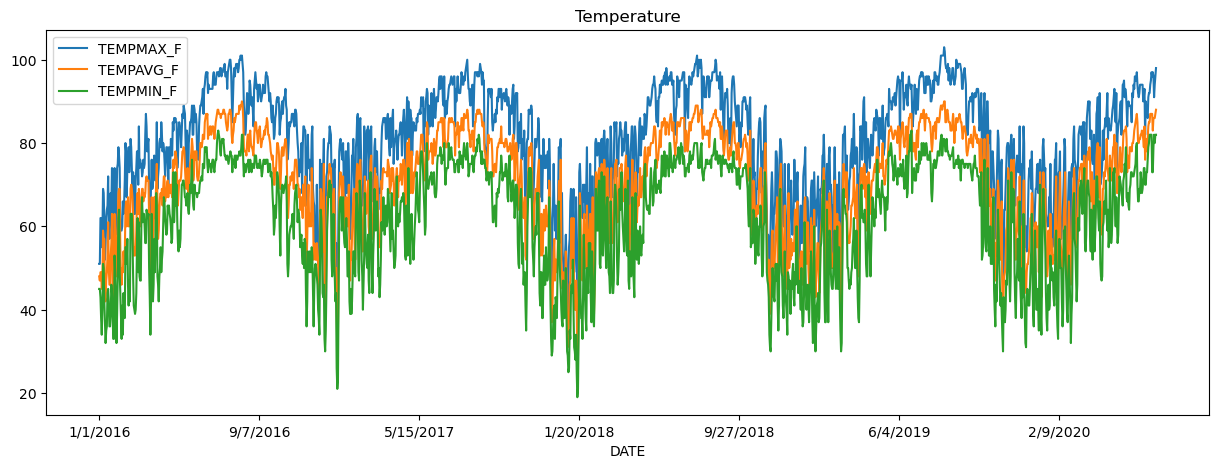

In [22]:
# Timeline plot of the daily temperatures

df1.plot(x='DATE', y=['TEMPMAX_F', 'TEMPAVG_F', 'TEMPMIN_F'], figsize=(15,5), 
        title='Temperature')

<AxesSubplot:xlabel='TEMPMAX_F', ylabel='TEMPMIN_F'>

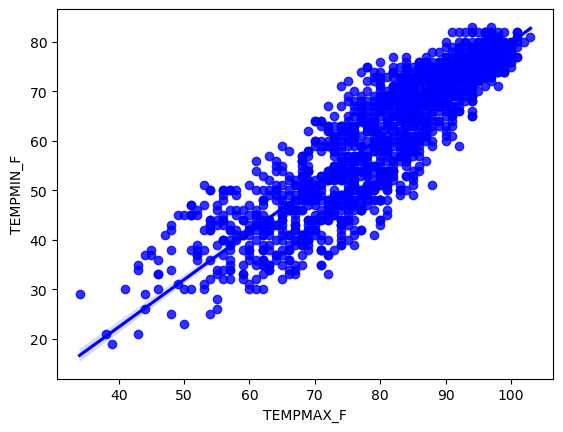

In [23]:
# Scatter plot between the min and max temperatures

sns.regplot(x = 'TEMPMAX_F', y = 'TEMPMIN_F', color="b", data = df1)

# TEMPERATURE PREDICTIONS USING LINEAR  REGRESSION

In [24]:
df_weather = df.drop(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
                      'WINDAVG','DAPR', 'EVAP', 'MDPR', 'PGTM', 'SNOW', 'SNWD',
                      'TOBS', 'WDF2', 'WDF5', 'WESD', 'WESF', 'WSF2', 'WSF5', 
                      'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06', 'WT08', 
                      'WT10', 'WT11'], axis=1)

In [25]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1652 entries, 0 to 1651
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DATE           1652 non-null   object 
 1   PRECIPITATION  1652 non-null   float64
 2   RAIN           1652 non-null   int64  
 3   TEMPAVG_F      1652 non-null   int64  
 4   TEMPMAX_F      1652 non-null   int64  
 5   TEMPMIN_F      1652 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 77.6+ KB


In [26]:
df_weather.describe()

PRECIPITATION         RAIN    TEMPAVG_F    TEMPMAX_F    TEMPMIN_F
count    1652.000000  1652.000000  1652.000000  1652.000000  1652.000000
mean        0.164122     0.303874    70.683414    80.921308    61.582930
std         0.692653     0.460068    12.453947    12.655616    13.624799
min         0.000000     0.000000    27.000000    34.000000    19.000000
25%         0.000000     0.000000    62.000000    73.000000    50.000000
50%         0.000000     0.000000    73.000000    83.000000    65.000000
75%         0.020000     1.000000    81.000000    91.000000    74.000000
max        16.070000     1.000000    90.000000   103.000000    83.000000

# Prepare data for training

In [27]:
X = df_weather['TEMPMIN_F'].values.reshape(-1,1)
y = df_weather['TEMPMAX_F'].values.reshape(-1,1)

In [29]:
# Spit the data into 70% training and 30% testing set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ready for Regression analysis

In [30]:
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [31]:
# Checking the model with intercept and coefficients (slope)
# Print the intercept and coefficients

print('intercept:', linreg.intercept_)
print('slope:', linreg.coef_)

intercept: [29.62011356]
slope: [[0.83187474]]


# The Slope and Intercept are important concept of Linear Regression. From the above we get 29.6201 intercept and 0.8319 slope. This means for every one unit of change in Min Temperature, the change in Max Temperature is about 0.83%

Predicting the Test set results

In [32]:
y_pred = linreg.predict(X_test)

In [33]:
# Printing the prediction results
df_temp = pd.DataFrame({'Actual Temp': y_test.flatten(), 'Predicted Temp': y_pred.flatten()})
df_temp

Actual Temp  Predicted Temp
0             84       78.700723
1             75       68.718227
2             95       93.674469
3             90       91.178845
4             67       57.071980
..           ...             ...
491           78       69.550101
492           93       91.178845
493           69       77.036974
494           85       74.541350
495           83       87.851346

[496 rows x 2 columns]

# Visualize comparison results

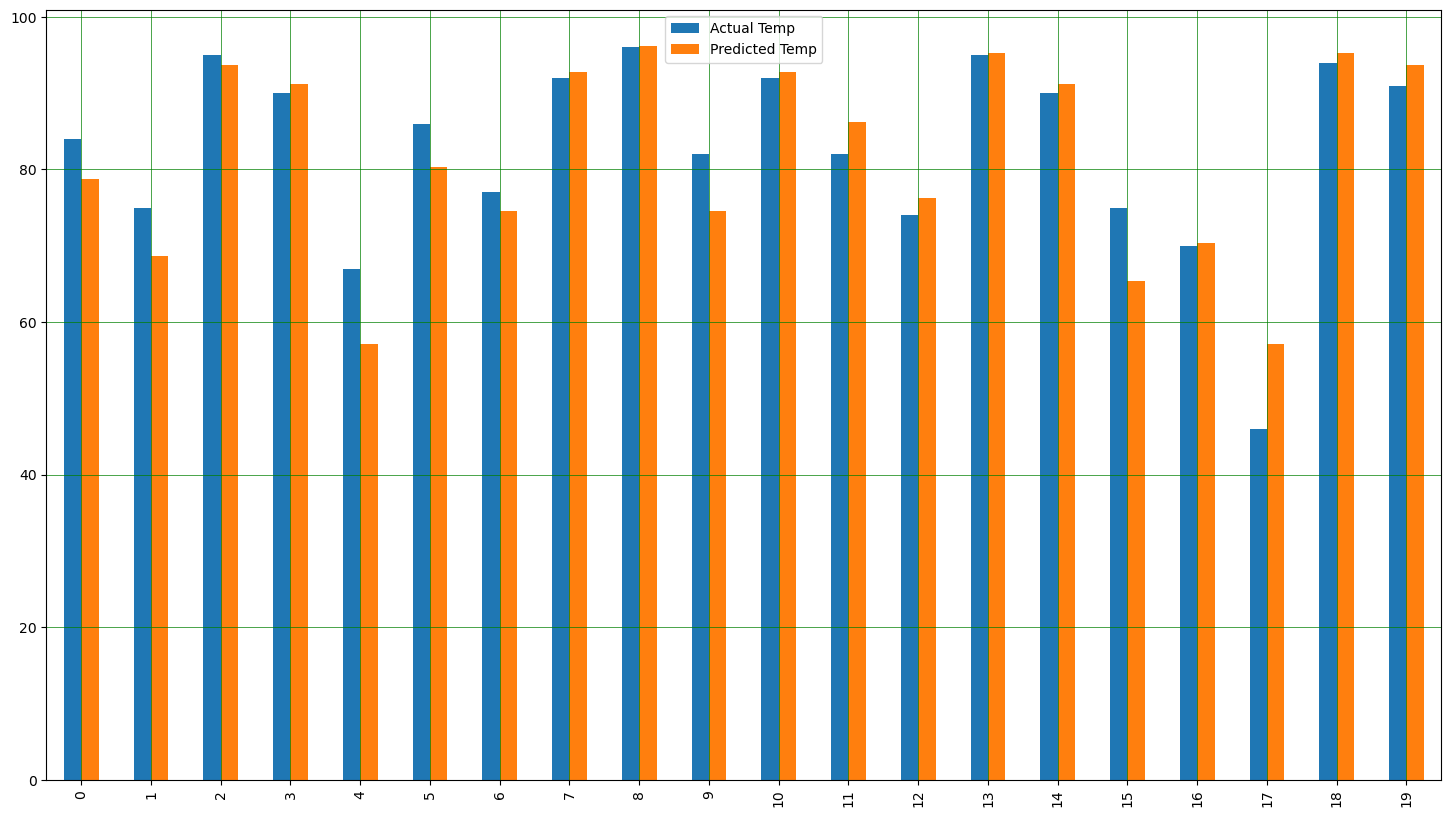

In [34]:
df_temp1 = df_temp.head(20)
df_temp1.plot(kind='bar',figsize=(18,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Our Linear Regression model is not very precise, but the predicted temperatures are close to the actual ones.
Base on the above bar graph, Regeression models is relatively simple straight forward and easy to clarify between the actual and predicted temperatures.

# Regression line

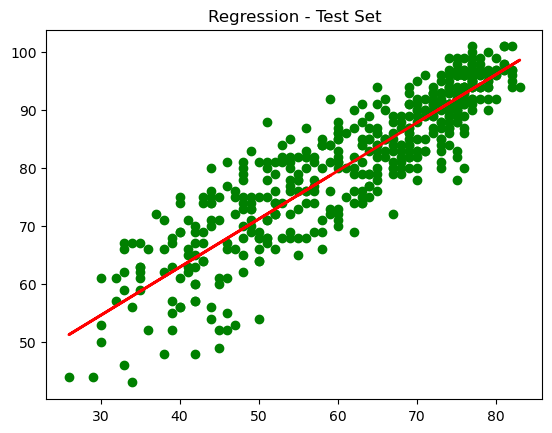

In [35]:
# Draw a Regression line on the Test Set

plt.scatter(X_test, y_test,  color='green')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression - Test Set')
plt.show()

Scatter plot graph between X_test and y_test datasets and we draw a regression line.The straight red line shows our algorithm is correct. Our model looks like a good fit for this data.

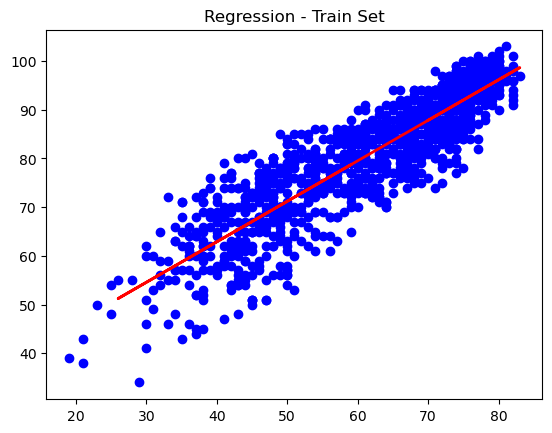

In [36]:
# # Draw a Regression line on the Train Set

plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Regression - Train Set')
plt.show()

Scatter plot graph between X_train and y_train datasets and we draw a regression line.The straight red line shows our algorithm is correct.

# Evaluation metrics of our Linear Regression model

In [37]:
from sklearn import metrics
# Analyzing our model

# Calculate the coefficients
print('Coefficients: \n', linreg.coef_)

# Calculate the mean absolute error
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

# Calculate the mean squared error
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 

# Calculate the root mean squared error
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# Calculate the R-squared (or coefficient of determinationnote. 1 is a perfect prediction.
print('Coefficient of Determination:', metrics.r2_score(y_test, y_pred))

Coefficients: 
 [[0.83187474]]
Mean Absolute Error: 4.325129418794831
Mean Squared Error: 30.63132685300835
Root Mean Squared Error: 5.534557511943331
Coefficient of Determination: 0.8013689908360337


Results:
- The MSE is the average of the square of the prediction errors. The larger the number, the larger is the error. We can see that the error is 30.63, so it is high. But there is not a correct value for the MSE. Of course, the lower the error, the better, and zero means the model is perfect. Since there is no correct answer, we cannot conclude that our prediction model is incorrect.
- The RMSE is the error rate by the square root of MSE. We can see that the RMSE is 5.53, which is about less than 15% of the 'mean' value of the percentage of all the temperature, i.e. 70.68. This means our algorithm did a decent job. It has made a fairly good prediction (We can see it in the bar plot above).
- The MAE is the difference between the original and predicted values extracted by the averaged absolute difference over the data. We can see that it is 4.32, and it is slightly smaller than the RMSE.
- The Coefficient of Determination is about 80%, which is fairly good. The higher the value the better is the model

# Lets do further performance measure on the Training and Test Data

In [38]:
from sklearn.metrics import mean_squared_error as mse

y_pred = linreg.predict(X_test)
print("Mean Squared Error on Training Data --> {}\nMean Squared Error on Test Data --> {}".format(mse(y_train, linreg.predict(X_train)), mse(y_test, y_pred)))

Mean Squared Error on Training Data --> 34.62892696482489
Mean Squared Error on Test Data --> 30.63132685300835


From the above performance measure, we got the mean squared errors on training and test data 34.6 and 30.6; this shows that the mean squared errors are closure between test and train datasets. This means the model tends to not overfitting the data.

# Visualizing the model with Residuals Plot - Train and Test data

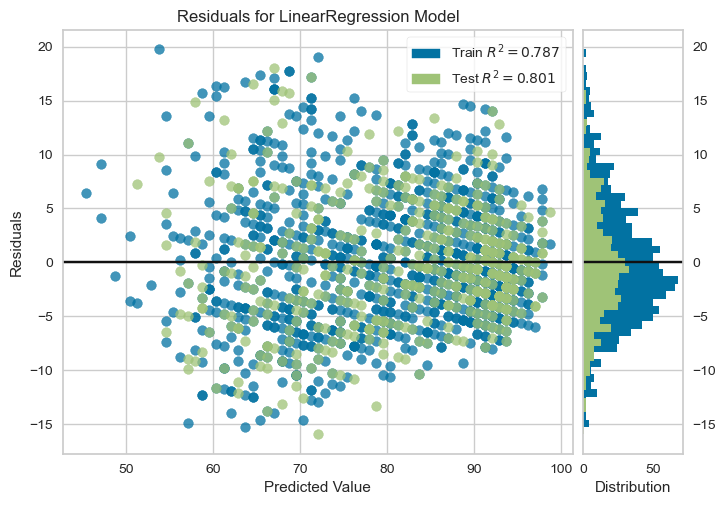

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [42]:
from yellowbrick.regressor import ResidualsPlot
# To understand it much further we plot the Residual Plot for this model.

visualizer = ResidualsPlot(linreg)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)  
visualizer.poof()

Results:
From the above residual plot, we can see that the points are not circulate and cramp around the horizontal axis. Rather, they are randomly scatter and spread out. This seems to indicate that our Linear Regression model is performing quite well.